In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.summarystats as ds
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from delfi.simulator.Gauss import Gauss

In [2]:
n_params = 1

m = Gauss(dim=n_params)
p = dd.Gaussian(m=np.zeros((n_params, )), S=np.eye(n_params))
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)

In [3]:
# set up inference
res = infer.Basic(g, network_spec={'n_hiddens': [10]})

# run with N samples
out = res.run(1000)

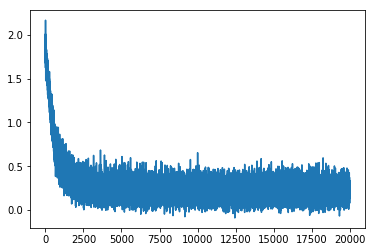

In [5]:
plt.plot(out['trn_iter'], out['trn_val'])

In [6]:
posterior = res.predict(np.array([[0.]]))

In [7]:
posterior.xs[0].m

array([-0.00040421], dtype=float32)

In [8]:
posterior.xs[0].S

array([[ 0.09479642]], dtype=float32)